# Chapter 6 Computation on NumPy Arrays: Universal Functions

## The Slowness of Loops

In [2]:
import numpy as np
rng = np.random.default_rng(seed=1701)

def compute_reciprocals(values):
  output = np.empty(len(values))
  for i in range(len(values)):
    output[i] = 1.0 / values[i]
  return output

values = rng.integers(1, 10, size=5)
compute_reciprocals(values)

array([0.11111111, 0.25      , 1.        , 0.33333333, 0.125     ])

In [4]:
big_array = rng.integers(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

2.47 s ± 469 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Introducing Ufuncs

In [7]:
print(compute_reciprocals(values))
print(1.0 / values)

[0.11111111 0.25       1.         0.33333333 0.125     ]
[0.11111111 0.25       1.         0.33333333 0.125     ]


In [8]:
%timeit (1.0 / big_array)

1.83 ms ± 199 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
# operate between two arrays
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

In [12]:
# ufunc operations act on multidimensional arrays
x = np.arange(9).reshape((3, 3))
2 ** x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]])

## Exploring Numpy's Ufuncs

### Array Arithmetic

In [21]:
x = np.arange(4)
print("x      =", x)
print("x + 5  =", x + 5)
print("x - 5  =", x - 5)
print("x * 2  =", x * 2)
print("x / 2  =", x / 2)
print("x // 2  =", x // 2) # floor division

x      = [0 1 2 3]
x + 5  = [5 6 7 8]
x - 5  = [-5 -4 -3 -2]
x * 2  = [0 2 4 6]
x / 2  = [0.  0.5 1.  1.5]
x // 2  = [0 0 1 1]


In [23]:
print("-x      =", -x)
print("x ** 2  =", x ** 2)
print("x % 2  =", x % 2)

-x      = [ 0 -1 -2 -3]
x ** 2  = [0 1 4 9]
x % 2  = [0 1 0 1]


In [24]:
-(0.5 * x + 1) ** 2

array([-1.  , -2.25, -4.  , -6.25])

In [26]:
# All of these arithmetic operations are simply convenient wrappers around specific ufuncs built into NumPy.
np.add(x, 2)

array([2, 3, 4, 5])

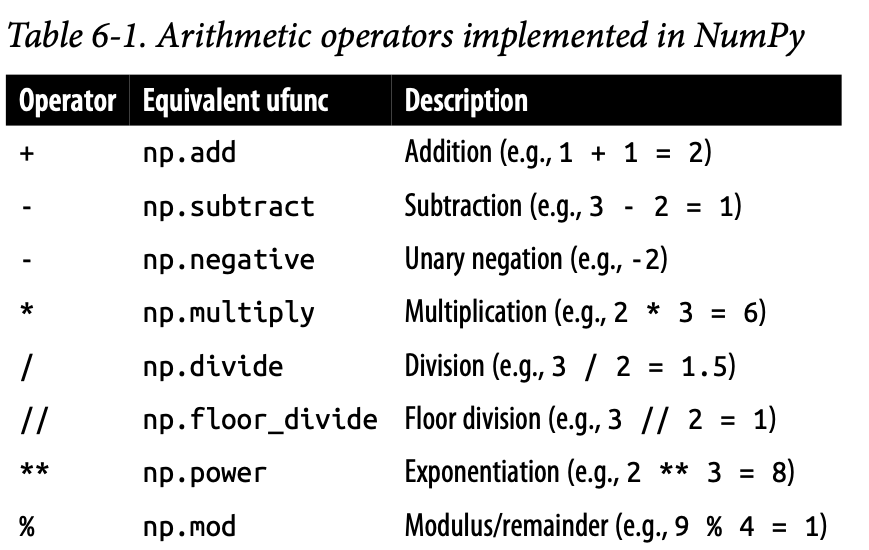

### Absolute Value

In [34]:
x = np.array([-2, -1, 0, 1, 2])
abs(x)

array([2, 1, 0, 1, 2])

In [35]:
np.absolute(x)

array([2, 1, 0, 1, 2])

In [36]:
np.abs(x)

array([2, 1, 0, 1, 2])

In [40]:
x = np.array([3 - 4j, 4 - 3j, 2 + 0j, 0 + 1j])
np.abs(x) # for complex data, abs() returns the magnitude

array([5., 5., 2., 1.])

### Trigonometric Functions

In [50]:
theta = np.linspace(0, np.pi, 3)

In [56]:
print('theta        = ', theta)
print('sin(theta)   = ', np.sin(theta))
print('cos(theta)   = ', np.cos(theta))
print('tan(theta)   = ', np.tan(theta))

theta        =  [0.         1.57079633 3.14159265]
sin(theta)   =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta)   =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta)   =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [60]:
x = [-1, 0, 1]
print('x          = ', x)
print('arcsin(x)  = ', np.arcsin(x))
print('arccos(x)  = ', np.arccos(x))
print('arctan(x)  = ', np.arctan(x))

x          =  [-1, 0, 1]
arcsin(x)  =  [-1.57079633  0.          1.57079633]
arccos(x)  =  [3.14159265 1.57079633 0.        ]
arctan(x)  =  [-0.78539816  0.          0.78539816]


### Exponents and Logarithms

In [64]:
x = [1, 2, 3]
print('x      = ', x)
print('e^x.   = ', np.exp(x))
print('2^x.   = ', np.exp2(x))
print('3^x.   = ', np.power(3., x))

x      =  [1, 2, 3]
e^x.   =  [ 2.71828183  7.3890561  20.08553692]
2^x.   =  [2. 4. 8.]
3^x.   =  [ 3.  9. 27.]


In [68]:
x = [1, 2, 4, 10]
print('x        = ', x)
print('ln(x)    = ', np.log(x))
print('log2(x)  = ', np.log2(x))
print('log10(x) = ', np.log10(x))

x        =  [1, 2, 4, 10]
ln(x)    =  [0.         0.69314718 1.38629436 2.30258509]
log2(x)  =  [0.         1.         2.         3.32192809]
log10(x) =  [0.         0.30103    0.60205999 1.        ]


In [71]:
x = [0, 0.001, 0.01, 0.1]
print('exp(x) - 1 = ', np.expm1(x))
print('log(1 + x) = ', np.log1p(x))

exp(x) - 1 =  [0.         0.0010005  0.01005017 0.10517092]
log(1 + x) =  [0.         0.0009995  0.00995033 0.09531018]


### Specialized Ufuncs

In [72]:
from scipy import special

In [75]:
# Gamma functions (generalized factorials) and related functions
x = [1, 5, 10]
print('gamma(x)       = ', special.gamma(x))
print('ln|gamma(x)    = ', special.gammaln(x))
print('beta(x, 2).    = ', special.beta(x, 2))

gamma(x)       =  [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)    =  [ 0.          3.17805383 12.80182748]
beta(x, 2).    =  [0.5        0.03333333 0.00909091]


In [78]:
# Error function (integral of Gaussian),
# its complement, and its inverse
x = np.array([0, 0.3, 0.7, 1.0])
print("erf(x)  =", special.erf(x))
print("erfc(x)  =", special.erfc(x))
print("erfinv(x)  =", special.erfinv(x))

erf(x)  = [0.         0.32862676 0.67780119 0.84270079]
erfc(x)  = [1.         0.67137324 0.32219881 0.15729921]
erfinv(x)  = [0.         0.27246271 0.73286908        inf]


## Advanced Ufunc Features

### Specifying Output

### Aggregations

### Outer Products

## Ufuncs: Learning More